# Problem Set 3
## Forecasting/Predictive Analysis 


--------------------------------

#### **Name: Sherry Peng Tian** 

#### **Date: Nov. 12, 2019** 




### Hyndman Book Chapter 5.10
### Exercise 1 

In [1]:
# Set up and install packages 
library(ggplot2)
library(fpp2)

Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”Loading required package: fma
Loading required package: expsmooth


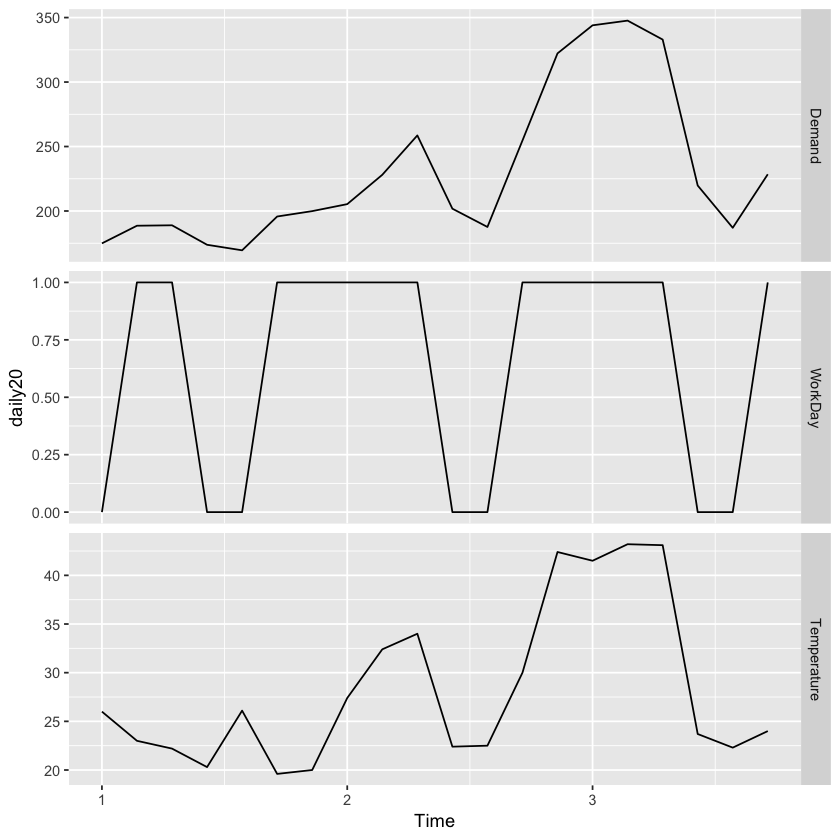

In [2]:
daily20 <- head(elecdaily, 20)
autoplot(daily20, facets = TRUE)

- Why is there a positive relationship? 

There is a positive relationship between Temperature and Demand, because when the temperature raises among the time, people need to use the Airconditioning more often, resulting in a larger use of electricity. 

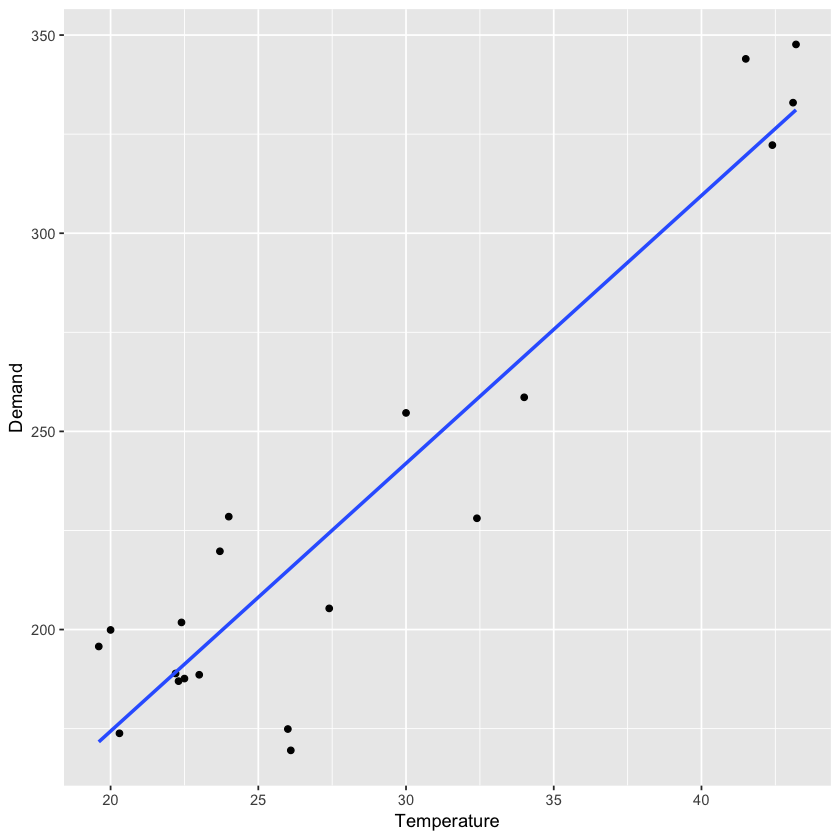

In [3]:
daily20 %>%
  as.data.frame() %>%
  ggplot(aes(x=Temperature, y=Demand)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE)


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals from Linear regression model
LM test = 3.8079, df = 5, p-value = 0.5774



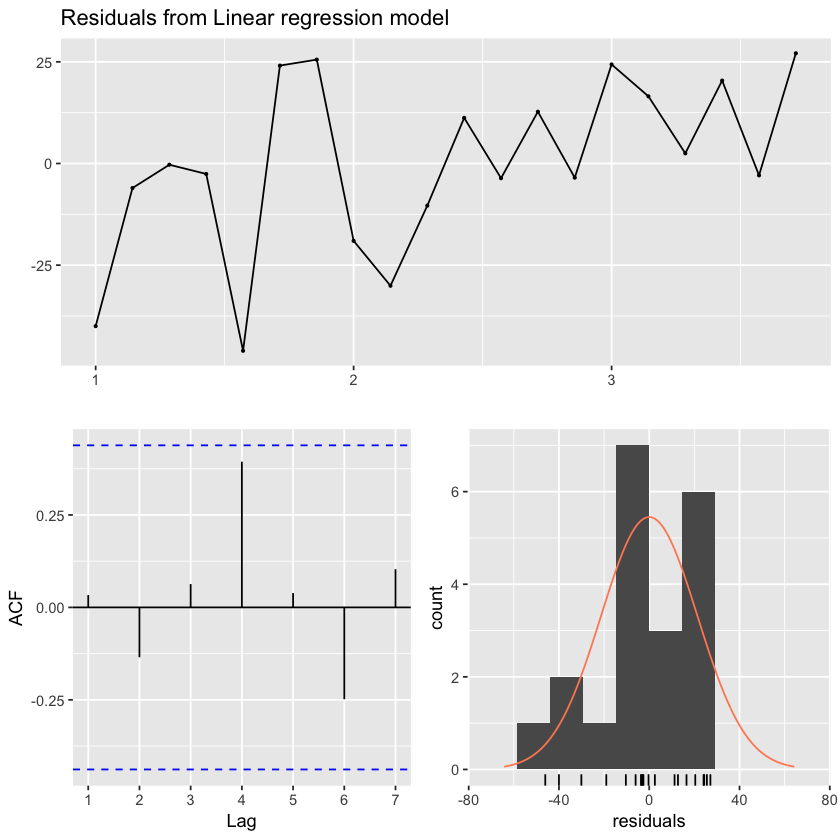

In [4]:
fit <- tslm(Demand ~ Temperature, data=daily20)
checkresiduals(fit)

- Is the model adequate? Are there any outliers or influential observations? 

The model is not quite adequate, from my perspective because the distribution of OLS regression residuals is not normal or splattered around 0 even though there is no clear clue of autocorrelation from the ACF chart. 

In [5]:
forecast(fit, newdata=data.frame(Temperature=c(15,35)))

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
3.857143       140.5701 108.6810 172.4591  90.21166 190.9285
4.000000       275.7146 245.2278 306.2014 227.57056 323.8586

### Hyndman Book Chapter 6.9 
### Exercise 3 

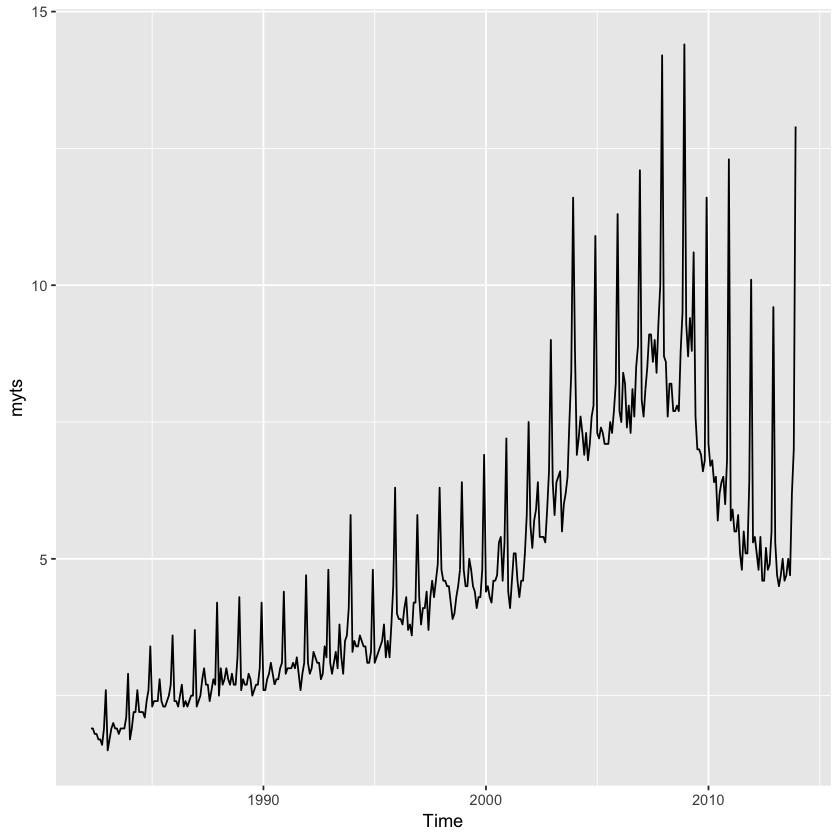

In [6]:
retaildata <- readxl::read_excel("data/retail.xlsx", skip = 1)
# skip=1 is required because the Excel sheet has two header rows 
samplets <- ts(retaildata[, "A3349873A"], 
               frequency = 12, start = c(1982, 4))
myts <- ts(retaildata[, "A3349588R"], 
           frequency = 12, start = c(1982, 4))
autoplot(myts)

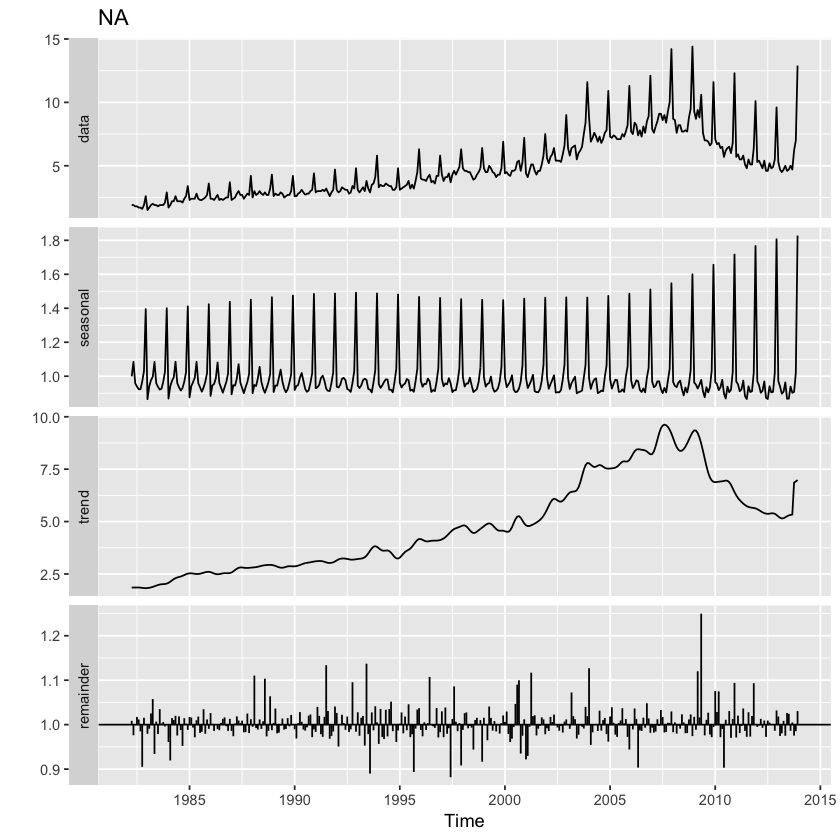

In [7]:
library(seasonal)
fit <- seas(myts, x11 = "") #title = "Retail Data A3349588R"
autoplot(fit)

Before decomposition, we assume there is a strong seasonal trend within the data distribution, but actually, from the "seasonal part" decomposition, the seasonal trend fluctuates more approaching the present time, which is not entirely following the definition of seasonality. Additionally, the remainer graph shows that there is more noise from 1990 to 2005 and there is a high peak around 2010 (and then drop) for the retail data. 

### Exercise 4 

- a. From the decomposition, we find that there is upward trend for the data, the number of persons in the civilian labor force in Australia from Feb. 1978 to Aug. 1995. There is also a strong signal of seasonality going on, and the seasonal trend flutuates more approaching the end. However, the remainder graph draws attention to the drops around 1991-1993. The seasonal component from decomposition in monthly format indicates the decreasing trend from February to August, and then kind of noisy at the end of each year. 

- b. Yes, definitely the remainder graph could be explained by the recession of 1991/1992 because those unusual drops came from the loss of labor population. Meanwhile, the monthly seasonal component says the same from convex shapes. 

### Exercise 5 

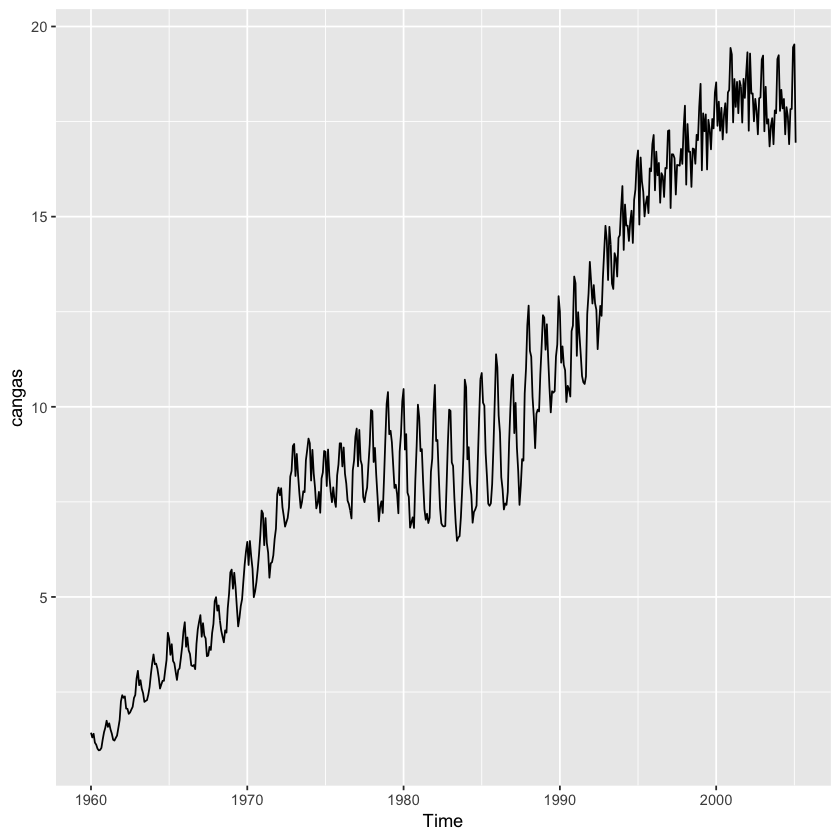

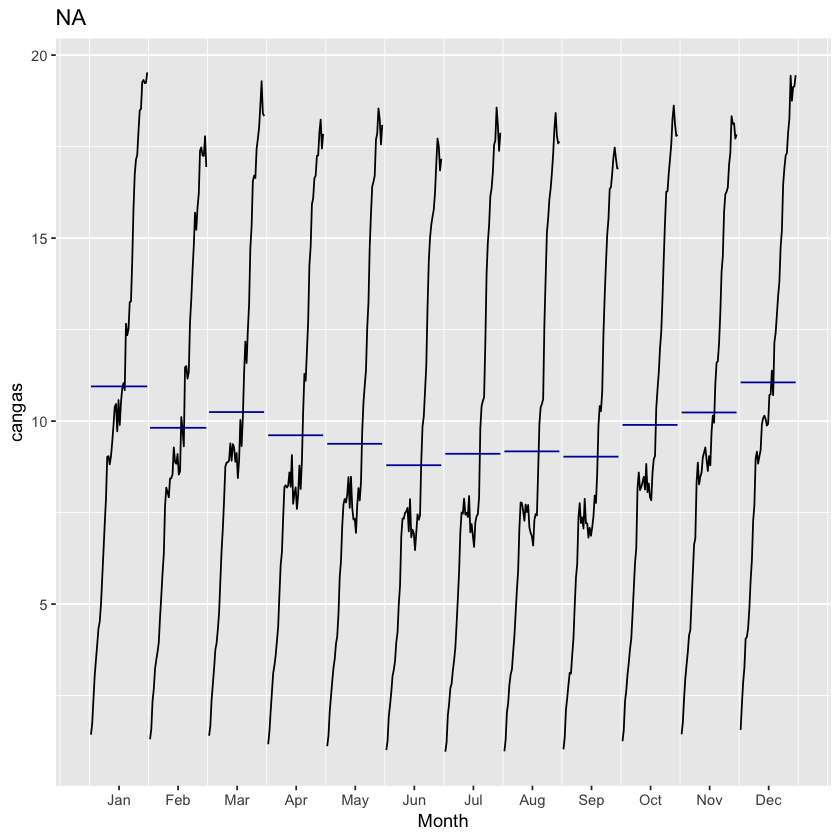

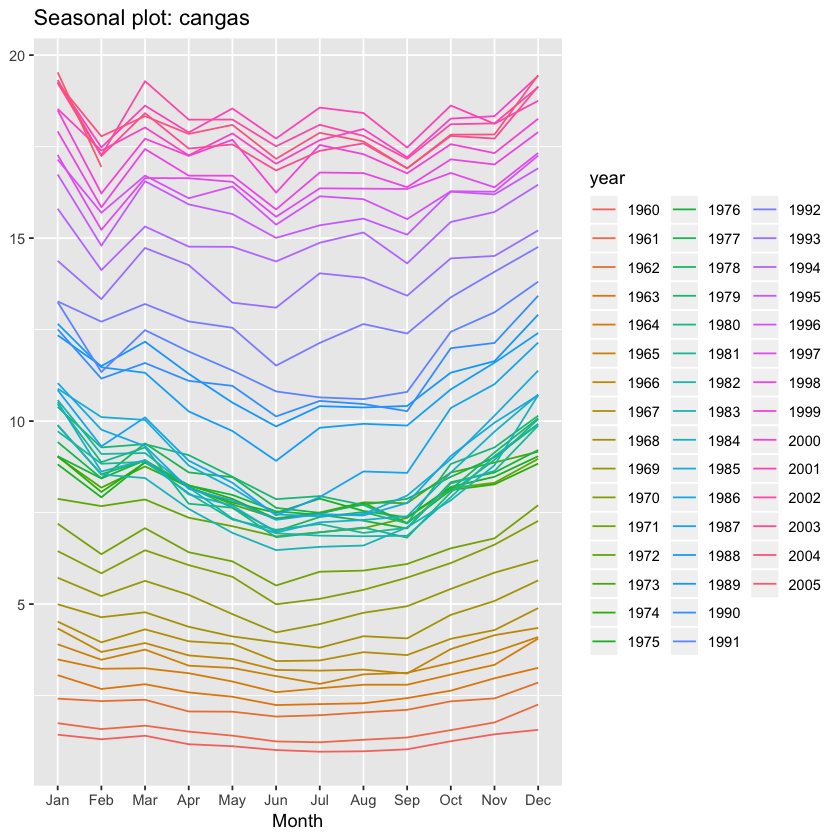

In [8]:
autoplot(cangas)
ggsubseriesplot(cangas)
ggseasonplot(cangas)

- a. The effect of the changing seasonality of `cangas` is shown through more patterns of seasonality happening in the recent time compared to the past before 1970s. Less gas is produced in the middle of each year compared to more from November to February, maybe because gas demand is needed less in the summer when families are not heating up, so the production was adjusted accordingly. 

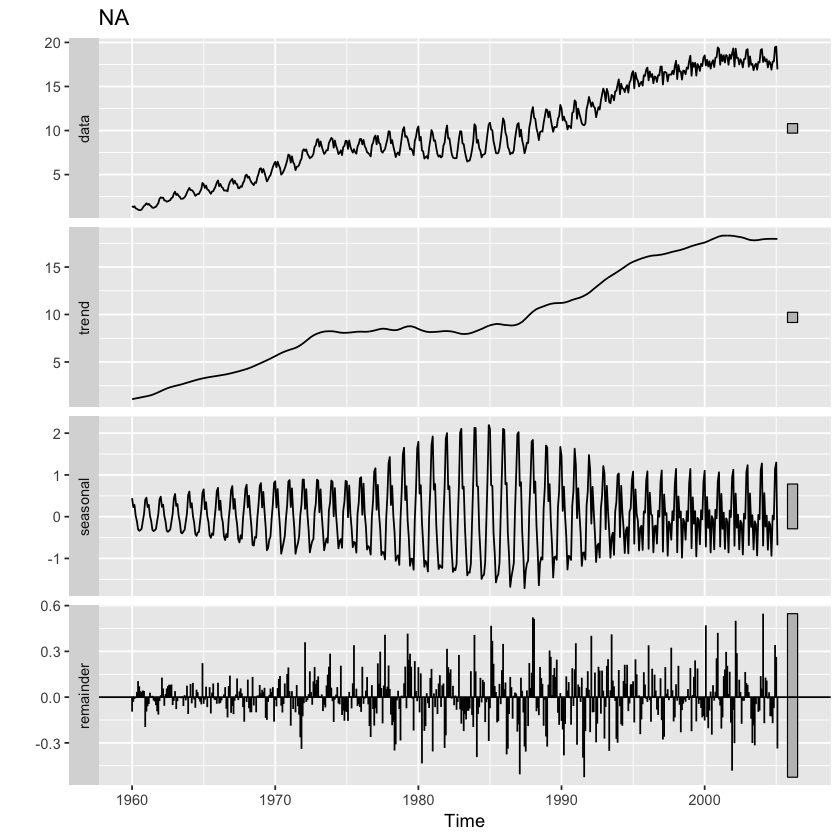

In [9]:
cangas %>% 
    stl(s.window = 7) %>% 
        autoplot()
# s.window = span(in lags) of the loss window for the seasonal extraction; 
        # need to be odd and at least 7, but slow down with large data 
# t.window = smoothing window with larger range for trend 

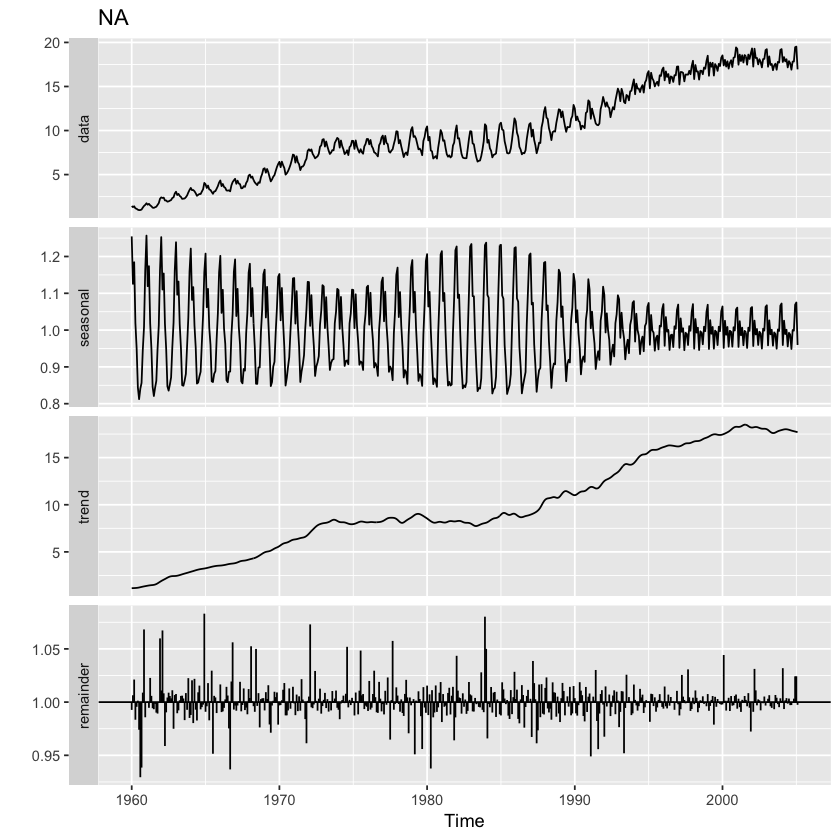

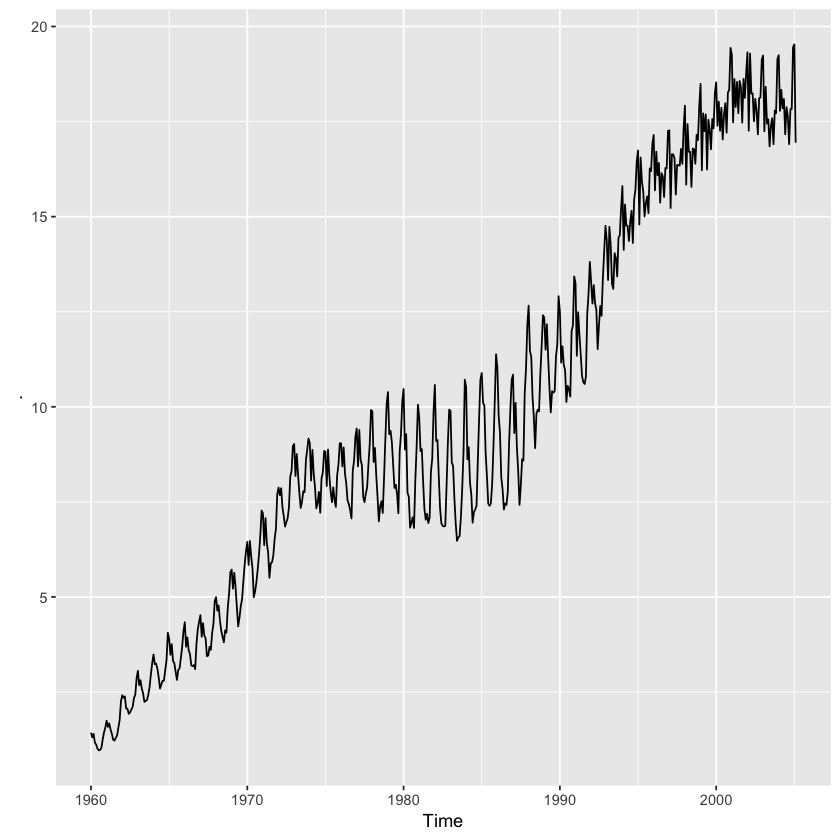

In [10]:
cangas %>% 
    seas(, x11 = "") %>% 
    autoplot()
cangas %>% 
    # SEATS
    autoplot()

> - c. STL, SEATS, X11: How are they different? 

Clusterring lots of remainders for the beginning part of the data to seasonality rather than noise. 

### Exercise 6 



> We will use the bricksq data (Australian quarterly clay brick production. 1956–1994) for this exercise.

1. Use an STL decomposition to calculate the trend-cycle and seasonal indices. (Experiment with having fixed or changing seasonality.)
2. Compute and plot the seasonally adjusted data.
3. Use a naïve method to produce forecasts of the seasonally adjusted data.
4. Use stlf() to reseasonalise the results, giving forecasts for the original data.
5. Do the residuals look uncorrelated?
6. Repeat with a robust STL decomposition. Does it make much difference?
7. Compare forecasts from stlf() with those from snaive(), using a test set comprising the last 2 years of data. Which is better?

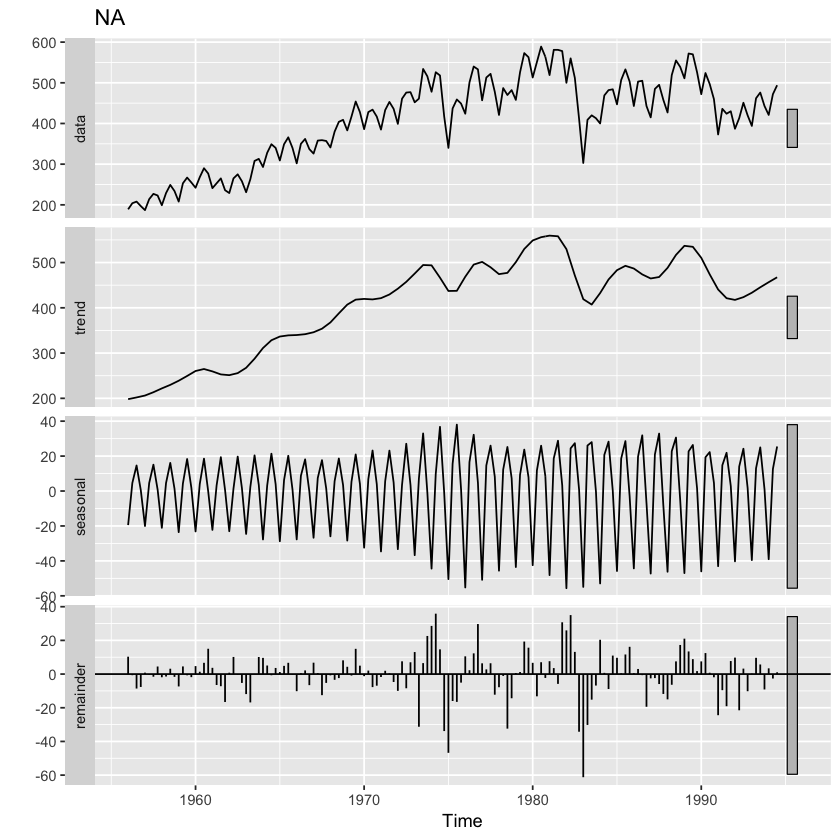

In [11]:
# a. Experiment with having fixed or changing seasonality? 
bricksq %>% 
    stl(s.window = 7, t.window = 11) %>% 
    autoplot()

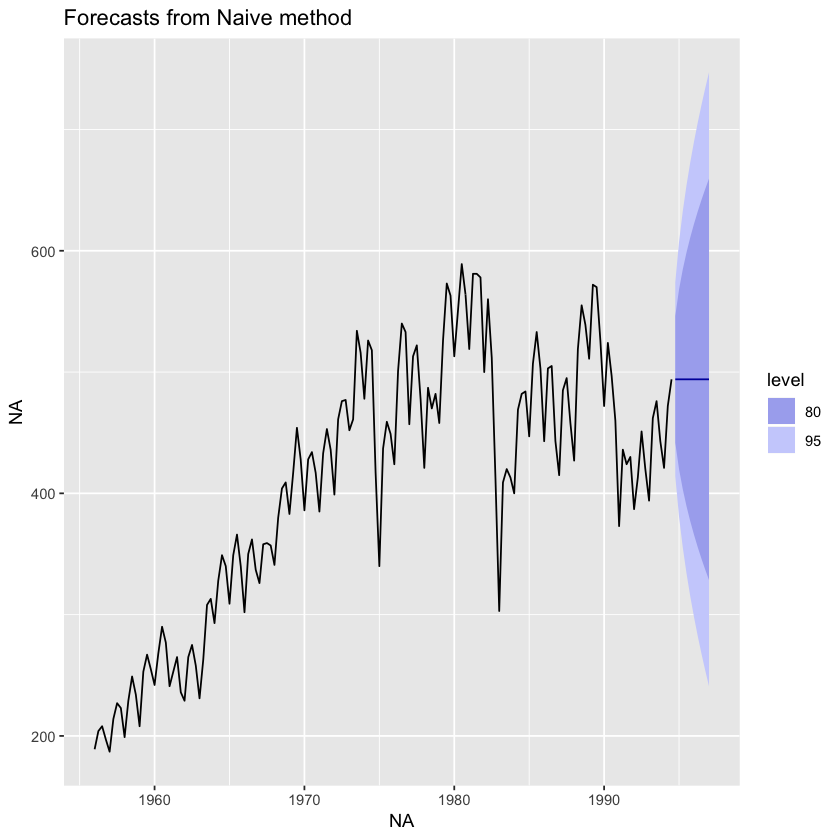

In [12]:
bricksq %>% 
    # seasonally adjusted 
    naive() %>% 
    autoplot()

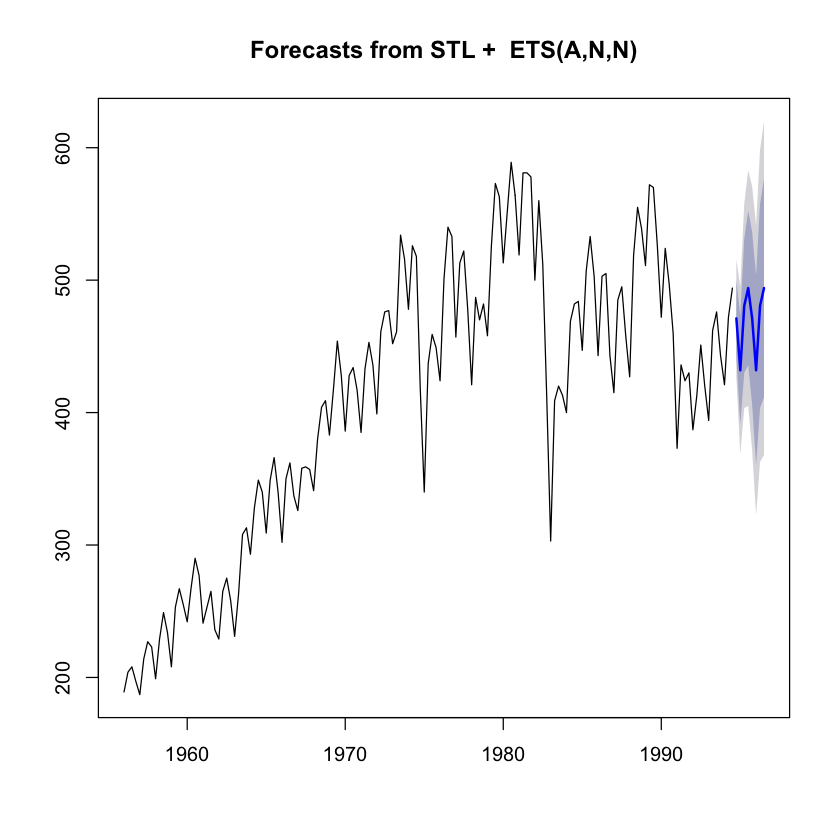

In [13]:
# d 
stl_model <- bricksq %>% 
    stl(s.window = "periodic") %>% 
    forecast()
plot(stl_model)

Warning message in checkresiduals(stl_model):
“The fitted degrees of freedom is based on the model used for the seasonally adjusted data.”


	Ljung-Box test

data:  Residuals from STL +  ETS(A,N,N)
Q* = 17.996, df = 6, p-value = 0.006241

Model df: 2.   Total lags used: 8



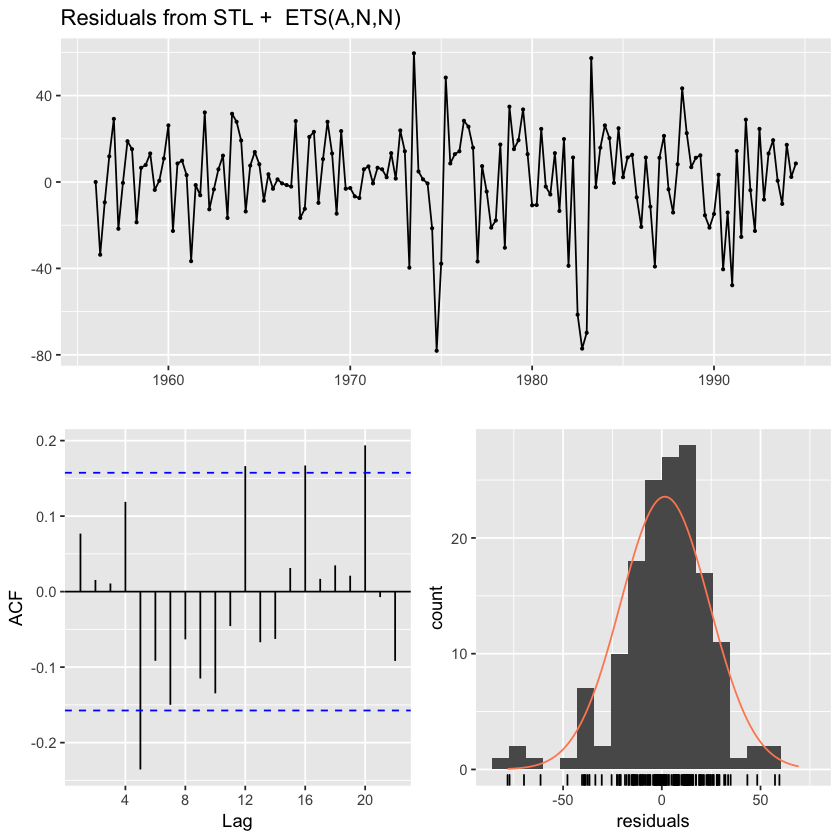

In [14]:
checkresiduals(stl_model)

- e. The residuals look uncorrelated because the p-value for Ljung-Box test is less than 0.05, meaning the test is statistically significant at above 95% confidence level. Moreover, the residuals are normally distributed, flutuating around zero axis. However, there must be some noise from autocorrelation, referring to the ACF graph. 

> `stlf()`: h = number of periods for forecasting, level = confidence level, lambda = "auto" Box-Cox transformation, s.window, t.window, robust = TRUE, method = "arima, naive, ..." 

Warning message in checkresiduals(stl_robust):
“The fitted degrees of freedom is based on the model used for the seasonally adjusted data.”

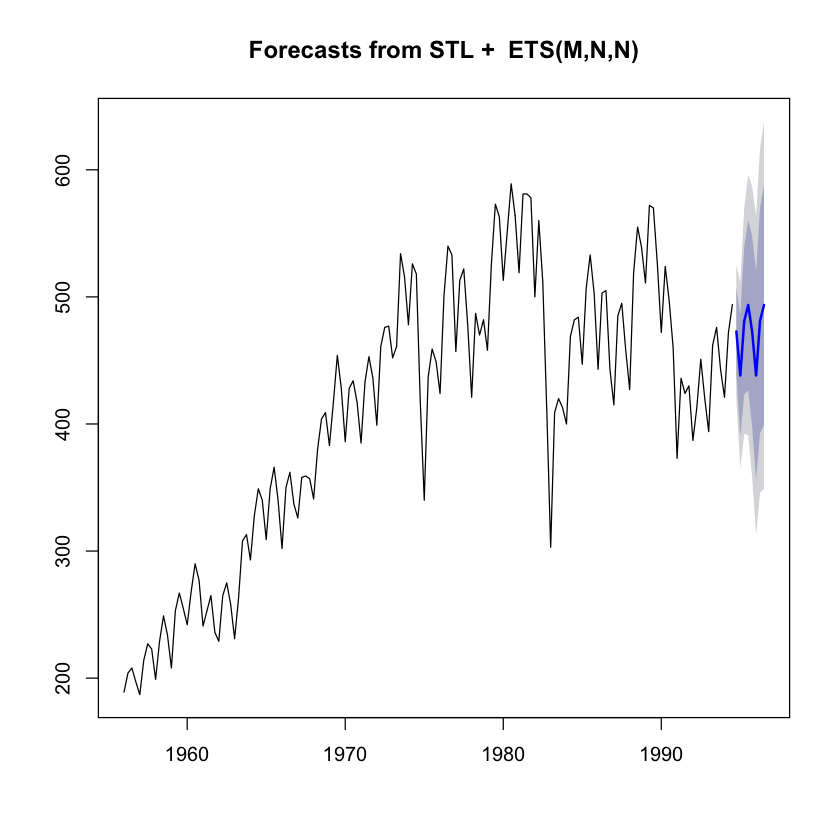


	Ljung-Box test

data:  Residuals from STL +  ETS(M,N,N)
Q* = 20.424, df = 6, p-value = 0.002326

Model df: 2.   Total lags used: 8



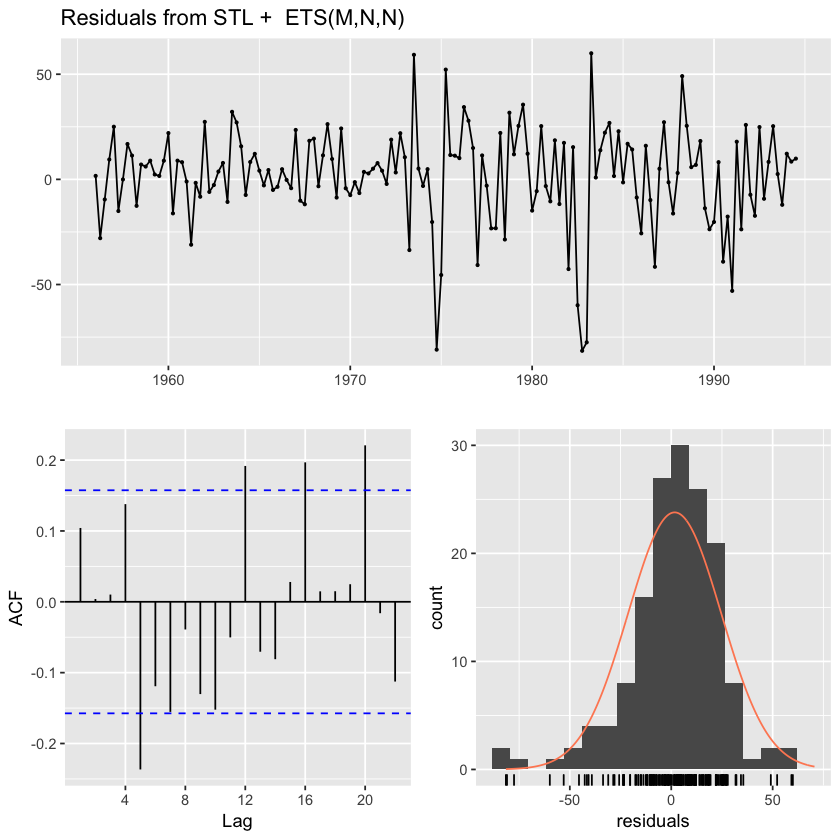

In [15]:
stl_robust <- bricksq %>% 
    stl(s.window = "periodic", robust = TRUE) %>% 
    forecast()
plot(stl_robust)
checkresiduals(stl_robust)

- f. There is more autocorrelation with robust `stlf()` model, maybe because the robust systems much less noise. 

- g. Judging from ME, RMSE, MAE, and MASE those common prediction accuracy rates, definitely `stlf()` method works better with the last 2 years of prediction. However, when parsing the data, I found that there is two missing quarterly values for those last 2 years, which might cause question to the comparison result. 

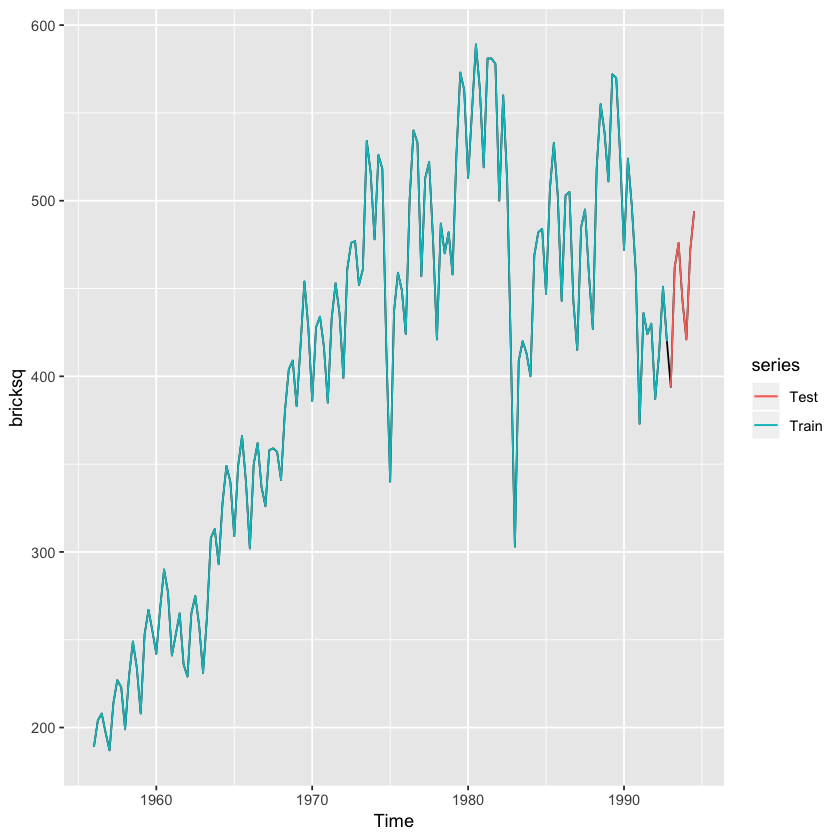

In [16]:
train <- window(bricksq, end = c(1992,4))
test <- window(bricksq, start = 1993)
autoplot(bricksq) + 
    autolayer(train, series = "Train") + 
    autolayer(test, series = "Test")

In [17]:
# snaive
nfit <- train %>% 
    # seasonally adjusted  %>% 
    naive() %>% 
    forecast(h = 4*2) 
accuracy(nfit, test) 
# stlf
sfit <- train %>% 
    stl(s.window = "periodic") %>% 
    forecast(h = 4*2)
accuracy(sfit, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.571429,40.95617,32.86395,0.03564104,8.213401,0.9071129,-0.082210792,NA
Test set,31.714286,45.17585,39.14286,6.52610567,8.411530,1.0804239,-0.007326224,1.115584


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.293215,22.94146,17.25340,0.2981726,4.522977,0.4762296,0.07899911,NA
Test set,34.270190,36.26371,34.27019,7.4809867,7.480987,0.9459282,0.17243754,0.9161642
